<a href="https://colab.research.google.com/github/ShathaCodes/IrisSupervisedLearning/blob/main/IrisSupervisedLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up

In [30]:
from itertools import cycle
import matplotlib
import pylab as pl
import collections
import numpy as np
import random
from sklearn import datasets
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#  I- Analysing the Dataset
dataset =  two dictinaries :

**.data** which stores an array describing the data in terms of attributes


**.target** which stores the classes (labels) of each instance (in case of supervised learning)

In [2]:
irisData = datasets.load_iris()

#2.a.1
print (irisData.data.shape)
print (irisData.target.shape)

print (irisData.feature_names)
print(irisData.target_names)

#2.a.2
k = collections.Counter(irisData.target)
print(k)
for i in range(0,3):
  print("Number of instances of the class ", irisData.target_names[i] ,  " is " , k[i])

#2.a.3
print(irisData.data[31])
print(irisData.target[31])

(150, 4)
(150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
Counter({0: 50, 1: 50, 2: 50})
Number of instances of the class  setosa  is  50
Number of instances of the class  versicolor  is  50
Number of instances of the class  virginica  is  50
[5.4 3.4 1.5 0.4]
0


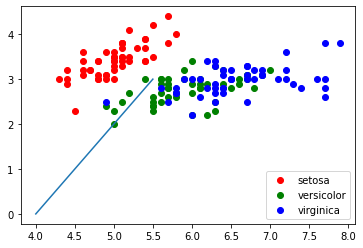

In [3]:
def plot_2D(data, target, target_names):
 colors = cycle('rgbcmykw') # color cycle
 target_ids = range(len(target_names))
 pl.figure()
 for i, c, label in zip(target_ids, colors, target_names):
  pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
 pl.plot([4,5.5],[0,3])
 pl.legend()
 pl.show()

plot_2D(irisData.data, irisData.target, irisData.target_names)

# II- Training using Naive Bayes

In [4]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
nb.fit(irisData.data[:], irisData.target[:])
p31 = nb.predict([irisData.data[31]])
print (p31)
plast = nb.predict([irisData.data[-1]])
print (plast)
p = nb.predict(irisData.data[:])
print (p)

k1 = collections.Counter(irisData.target==p)
print("accuracy = " , k1[True]/150)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
accuracy =  0.9533333333333334


In [5]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
nb.fit(irisData.data[:99], irisData.target[:99])
p=nb.predict(irisData.data[100:149])
print(p)

# it didn't train on the third class => 100% error
k2 = collections.Counter(irisData.target[100:149]==p)
print("accuracy = " , k2[True]/50)

# we need to shuffle

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy =  0.0


# III- Evaluating the performance of a classiffieur


It is necessary that the learning error ~ test error to avoid overfitting

In case of unbalanced dataset (a majority class), we must do some oversampling or undersampling of our data.

In [6]:
nb = naive_bayes.MultinomialNB(fit_prior=True)
irisData = datasets.load_iris()
nb.fit(irisData.data[:], irisData.target[:])
predicted = nb.predict(irisData.data[:])

### Performance of the training

In [7]:
def erreur_apprentissage(data,predicted,target):
    ea = 0
    for i in range(len(data)):
        if (predicted[i] != target[i]):
            ea = ea+1
    return ea/len(data)

In [8]:
def erreur_apprentissage_2(data,predicted,target):
    ea = np.count_nonzero(predicted-target)
    return ea/len(data)

In [9]:
def erreur_apprentissage_3(clf,test_samples,target):
    ea= 1 - clf.score(test_samples,target)
    return ea

In [10]:
print("error 1 = ", erreur_apprentissage(irisData.data,predicted,irisData.target))
print("error 2 = ", erreur_apprentissage_2(irisData.data,predicted,irisData.target))
print("error 3 = ", erreur_apprentissage_3(nb,irisData.data,irisData.target))

error 1 =  0.04666666666666667
error 2 =  0.04666666666666667
error 3 =  0.046666666666666634


### Generalized Performance

In [11]:
def split(S,test_size=1/3):
  X,y = S
  rand_dist = np.random.rand(len(X)) < (1-test_size)
  dataS1= X[rand_dist]
  targetS1= y[rand_dist]
  dataS2= X[~rand_dist]
  targetS2= y[~rand_dist]
  return [dataS1, targetS1, dataS2, targetS2]
#split((irisData.data, irisData.target))

In [12]:
def test(S, clf, choice, test_size=1/3):
  if choice == 1 :
    dataS1, targetS1, dataS2, targetS2 = split((irisData.data, irisData.target),test_size)
  else:
    dataS1, dataS2, targetS1, targetS2 = train_test_split(irisData.data, irisData.target, test_size=test_size)
  clf.fit(dataS1,targetS1)
  clf.predict(dataS2)
  acc = clf.score(dataS2,targetS2)
  return (1-acc)
#test(irisData, naive_bayes.MultinomialNB(fit_prior=True),2)

Is the estimated error smaller than the previously calculated apparent error? **Yes**

Do we always get the same estimate for the actual error? **No, the value changes with each execution**

In [13]:
def t_test(t, classifier= naive_bayes.MultinomialNB(fit_prior=True), choice=1, test_size=1/3):
  S = (irisData.data,irisData.target)
  e = 0
  for i in range(t):
    e += test(S,classifier,choice,test_size)
  return e/t

In [14]:
print("The error value with t=10 is ",  t_test(10))
print("The error value with t=50 is ",  t_test(50))
print("The error value with t=100 is ",  t_test(100))
print("The error value with t=200 is ",  t_test(200))
print("The error value with t=1000 is ",  t_test(1000))
print("The error value with t=10000 is ",  t_test(10000))
print("The error value with t=20000 is ",  t_test(20000))

The error value with t=10 is  0.1442337564874432
The error value with t=50 is  0.22721491552588285
The error value with t=100 is  0.20205991612995078
The error value with t=200 is  0.18802895220293003
The error value with t=1000 is  0.19126482760241476
The error value with t=10000 is  0.2018982943265738
The error value with t=20000 is  0.2032265345903113


Repeat the previous experience 20 times using the same value for t

In [15]:
for i in range(1,21):
  print(i, " - The error value with t=10 is ",  t_test(10))

1  - The error value with t=10 is  0.15746105306736086
2  - The error value with t=10 is  0.2319206719192338
3  - The error value with t=10 is  0.19361742014684155
4  - The error value with t=10 is  0.17643088127065362
5  - The error value with t=10 is  0.12555650297585583
6  - The error value with t=10 is  0.2050238938830608
7  - The error value with t=10 is  0.2180064671201273
8  - The error value with t=10 is  0.25336471237106084
9  - The error value with t=10 is  0.15559418522653817
10  - The error value with t=10 is  0.2102004736575273
11  - The error value with t=10 is  0.2568744062072853
12  - The error value with t=10 is  0.15349564140226313
13  - The error value with t=10 is  0.19121699043968474
14  - The error value with t=10 is  0.13443858072855097
15  - The error value with t=10 is  0.21656248879807588
16  - The error value with t=10 is  0.13664798491710112
17  - The error value with t=10 is  0.2575806863076956
18  - The error value with t=10 is  0.20253619459491728
19  - T

for each t, is the average error stable or not? Can you interpret this result? **no it is not stable.**

In [17]:
print("function split and test_size=0.1")
print("The error value with t=10 is ",  t_test(10, choice=1, test_size=0.1))
print("The error value with t=50 is ",  t_test(50, choice=1, test_size=0.1))
print("The error value with t=100 is ",  t_test(100, choice=1, test_size=0.1))
print("The error value with t=200 is ",  t_test(200, choice=1, test_size=0.1))
print("The error value with t=1000 is ",  t_test(1000, choice=1, test_size=0.1))

function split and test_size=0.1
The error value with t=10 is  0.11488927738927739
The error value with t=50 is  0.1441300339592505
The error value with t=100 is  0.11223232694378202
The error value with t=200 is  0.14121902324485613
The error value with t=1000 is  0.12811674509177914


In [18]:
print("Predefined function and test_size=0.33")
print("The error value with t=10 is ",  t_test(10, choice=2))
print("The error value with t=50 is ",  t_test(50, choice=2))
print("The error value with t=100 is ",  t_test(100, choice=2))
print("The error value with t=200 is ",  t_test(200, choice=2))
print("The error value with t=1000 is ",  t_test(1000, choice=2))

Predefined function and test_size=0.33
The error value with t=10 is  0.31399999999999995
The error value with t=50 is  0.21280000000000002
The error value with t=100 is  0.17779999999999993
The error value with t=200 is  0.2028000000000002
The error value with t=1000 is  0.20292000000000013


In [19]:
print("Predefined function and test_size=0.1")
print("The error value with t=10 is ",  t_test(10, choice=2, test_size=0.1))
print("The error value with t=50 is ",  t_test(50, choice=2, test_size=0.1))
print("The error value with t=100 is ",  t_test(100, choice=2, test_size=0.1))
print("The error value with t=200 is ",  t_test(200, choice=2, test_size=0.1))
print("The error value with t=1000 is ",  t_test(1000, choice=2, test_size=0.1))

Predefined function and test_size=0.1
The error value with t=10 is  0.059999999999999984
The error value with t=50 is  0.09599999999999995
The error value with t=100 is  0.1219999999999999
The error value with t=200 is  0.11566666666666649
The error value with t=1000 is  0.12186666666666707


### Estimate the actual error by cross-validation





In [20]:
def calcul_erreur(cv):
  nb = naive_bayes.MultinomialNB(fit_prior=True)
  result = 1- cross_val_score(nb, irisData.data, irisData.target, cv=cv)
  return np.average(result)

In [21]:
print("The error value with k=2 is ",calcul_erreur(2))
print("The error value with k=3 is ",calcul_erreur(3))
print("The error value with k=5 is ",calcul_erreur(5))
print("The error value with k=8 is ",calcul_erreur(8))

The error value with k=2 is  0.04666666666666669
The error value with k=3 is  0.053333333333333344
The error value with k=5 is  0.046666666666666655
The error value with k=8 is  0.05263157894736843


### IV- Training using other classifiers

In [32]:
clf = DecisionTreeClassifier()

clf.fit(irisData.data[:], irisData.target[:])
p = clf.predict(irisData.data[:])
ea= 1 - clf.score(irisData.data[:], irisData.target[:])
print("The error value on training set is ",  ea )

print("test_size = 0.33")
print("The error value with t=10  is ",  t_test(10, classifier=clf, choice=2 ))
print("The error value with t=50  is ",  t_test(50, classifier=clf,choice=2 ))
print("The error value with t=100 is ",  t_test(100, classifier=clf, choice=2 ))

print("test_size = 0.1")
print("The error value with t=10  is ",  t_test(10, classifier=clf, choice=2, test_size=0.1))
print("The error value with t=50  is ",  t_test(50, classifier=clf,choice=2, test_size=0.1))
print("The error value with t=100 is ",  t_test(100, classifier=clf, choice=2, test_size=0.1))

The error value on training set is  0.0
test_size = 0.33
The error value with t=10  is  0.05800000000000002
The error value with t=50  is  0.05480000000000004
The error value with t=100 is  0.05560000000000003
test_size = 0.1
The error value with t=10  is  0.06666666666666665
The error value with t=50  is  0.05066666666666664
The error value with t=100 is  0.046666666666666606


In [33]:
clf = RandomForestClassifier()

clf.fit(irisData.data[:], irisData.target[:])
p = clf.predict(irisData.data[:])
ea= 1 - clf.score(irisData.data[:], irisData.target[:])
print("The error value on training set is ",  ea )

print("test_size = 0.33")
print("The error value with t=10  is ",  t_test(10, classifier=clf, choice=2 ))
print("The error value with t=50  is ",  t_test(50, classifier=clf,choice=2 ))
print("The error value with t=100 is ",  t_test(100, classifier=clf, choice=2 ))

print("test_size = 0.1")
print("The error value with t=10  is ",  t_test(10, classifier=clf, choice=2, test_size=0.1))
print("The error value with t=50  is ",  t_test(50, classifier=clf,choice=2, test_size=0.1))
print("The error value with t=100 is ",  t_test(100, classifier=clf, choice=2, test_size=0.1))

The error value on training set is  0.0
test_size = 0.33
The error value with t=10  is  0.038000000000000034
The error value with t=50  is  0.056800000000000045
The error value with t=100 is  0.04840000000000003
test_size = 0.1
The error value with t=10  is  0.039999999999999994
The error value with t=50  is  0.05333333333333333
The error value with t=100 is  0.045999999999999944


In [34]:
clf = KNeighborsClassifier()

clf.fit(irisData.data[:], irisData.target[:])
p = clf.predict(irisData.data[:])
ea= 1 - clf.score(irisData.data[:], irisData.target[:])
print("The error value on training set is ",  ea )

print("test_size = 0.33")
print("The error value with t=10  is ",  t_test(10, classifier=clf, choice=2 ))
print("The error value with t=50  is ",  t_test(50, classifier=clf,choice=2 ))
print("The error value with t=100 is ",  t_test(100, classifier=clf, choice=2 ))

print("test_size = 0.1")
print("The error value with t=10  is ",  t_test(10, classifier=clf, choice=2, test_size=0.1))
print("The error value with t=50  is ",  t_test(50, classifier=clf,choice=2, test_size=0.1))
print("The error value with t=100 is ",  t_test(100, classifier=clf, choice=2, test_size=0.1))

The error value on training set is  0.033333333333333326
test_size = 0.33
The error value with t=10  is  0.04400000000000004
The error value with t=50  is  0.03560000000000002
The error value with t=100 is  0.03700000000000003
test_size = 0.1
The error value with t=10  is  0.02666666666666666
The error value with t=50  is  0.023999999999999994
The error value with t=100 is  0.042666666666666624
